Real estate inventory (Use Raw, All Homes, Monthly) --

1. For-Sale Inventory
2. New Listings
3. Newly Pending Listings
4. Days to Pending

Rentals --

1. ZORI (Smoothed): All Homes Plus Multifamily Time Series ($)

# **Uni-Variate Analysis**

### *Dependencies and Imports*

In [ ]:
# Used for data manipulation and analysis
import numpy as np
import pandas as pd
from functools import reduce
# statistical functions for QQ plot and  time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
# dates and times in Python.
import datetime
#  Used for creating visualizations and plots.
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [ ]:
## Provide the root path to this ipynb notebook
root_path = './'

### *Helper methods*

In [ ]:

def unpivot_dataframe(file_path, Metric_value='Metric_value'):
    # read csv
    data_frame = pd.read_csv(file_path)

    # Remove unwanted columns
    data_frame = data_frame.drop(['RegionID', 'SizeRank'], axis=1)

    # Unpivot DataFrame from having date values on columns to rows
    data_frame = data_frame.melt(id_vars=['RegionName','RegionType','StateName'], var_name='Date', value_name=Metric_value)

    # Convert Date field to DateTime type
    data_frame['Date'] = pd.to_datetime(data_frame['Date'])

    # Use interpolation to fill missing values.
    # Since the datasets are time series based, By leveraging the temporal information,
    # it can provide a more accurate estimation of values within the desired interval,
    # filling in the missing data between observed data points.
    data_frame = data_frame.set_index('Date')
    data_frame = data_frame.groupby('RegionName', group_keys=False).apply(lambda x: x.interpolate(method='time'))
    data_frame = data_frame.reset_index()

    # drop only entries with NaN values in the metric column
    return data_frame.dropna(subset=[Metric_value])

def plot_timeseries(df, plot_title, y_col='Metric_value'):
    # Filter the DataFrame for the national level data
    nation_df = df[df['RegionType'] == 'country']

    # Create the scatter plot using Plotly Express with the specified title
    fig = px.scatter(nation_df, x="Date", y=y_col, color="RegionName",
                     hover_data=['RegionName', y_col],
                     title=plot_title + " at National level")

    # Display the national level plot
    fig.show()

    # Filter the DataFrame for the metropolitan level data
    metro_df = df[df['RegionType'] != 'country']

    # Create the scatter plot at metropolitan level
    fig = px.scatter(metro_df, x="Date", y=y_col, color="RegionName",
                     hover_data=['RegionName', y_col, 'StateName'],
                     title=plot_title + " at metropolitan level")

    # Display the metropolitan level plot
    fig.show()

    # aggregate timeseries by state
    state_df = metro_df.groupby(['StateName', 'Date']).mean(numeric_only=True).reset_index()

    # Create the scatter plot at metropolitan level
    fig = px.scatter(state_df, x="Date", y=y_col, color="StateName",
                     hover_data=['StateName', y_col],
                     title=plot_title + " at state level")

    # Display the state level plot
    fig.show()

    # Plot trend, seasonality for national level data

    result=seasonal_decompose(nation_df[y_col], model='multiplicative', period=12)
    result.plot()

### *For Sale Inventory over the years*

In [ ]:
file_path = root_path + "/data/for_sale_inventory.csv"
For_Sale_Inventory_df = unpivot_dataframe(file_path, Metric_value='forSaleInventory')

plot_timeseries(For_Sale_Inventory_df, 'For Sale Inventory over the years', y_col='forSaleInventory')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
For_Sale_Inventory_df.describe()

,forSaleInventory
count,5.825400e+04
mean,2.603541e+03
std,4.216861e+04
min,5.000000e+00
25%,1.590000e+02
50%,3.310000e+02
75%,8.150000e+02
max,1.742337e+06


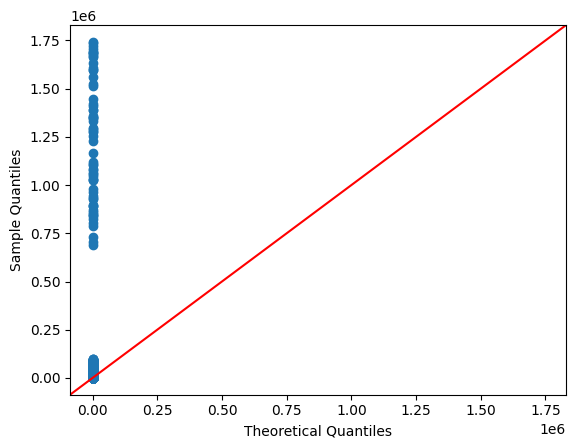

In [ ]:
# To determine if a metric is normally distributed, we use Q-Q plot (Quantile-Quantile plot)
# Q-Q plot helps to visually assess the data's departure from normality.
fig = sm.qqplot(For_Sale_Inventory_df['forSaleInventory'], line='45')
plt.show()

### *Newly Pending Listings over the years*

In [ ]:
file_path = root_path + "/data/newly_pending_listings.csv"
Newly_Pending_Listings_df = unpivot_dataframe(file_path, Metric_value='newlyPendingListings')

plot_timeseries(Newly_Pending_Listings_df, 'Newly Pending Listings over the years', y_col='newlyPendingListings')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Newly_Pending_Listings_df.describe()

,newlyPendingListings
count,48208.000000
mean,689.777125
std,10002.503240
min,5.000000
25%,31.000000
50%,66.000000
75%,192.000000
max,398775.000000


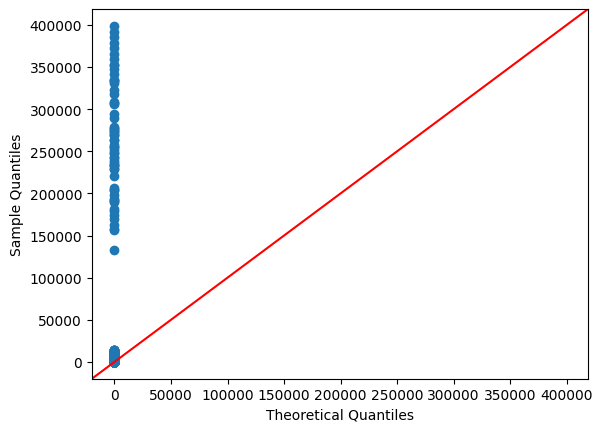

In [ ]:
# To determine if a metric is normally distributed, we use Q-Q plot (Quantile-Quantile plot)
# Q-Q plot helps to visually assess the data's departure from normality.
fig = sm.qqplot(Newly_Pending_Listings_df['newlyPendingListings'], line='45')
plt.show()

### *Mean Days to Pending over the years*

In [ ]:
file_path = root_path + "/data/mean_days_to_pending.csv"
Mean_Days_to_Pending_df = unpivot_dataframe(file_path, Metric_value='meanDaystoPending')

plot_timeseries(Mean_Days_to_Pending_df, 'Mean Days to Pending over the years', y_col='meanDaystoPending')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Mean_Days_to_Pending_df.describe()

,meanDaystoPending
count,32778.000000
mean,49.747702
std,27.988016
min,6.000000
25%,29.000000
50%,44.000000
75%,65.000000
max,294.000000


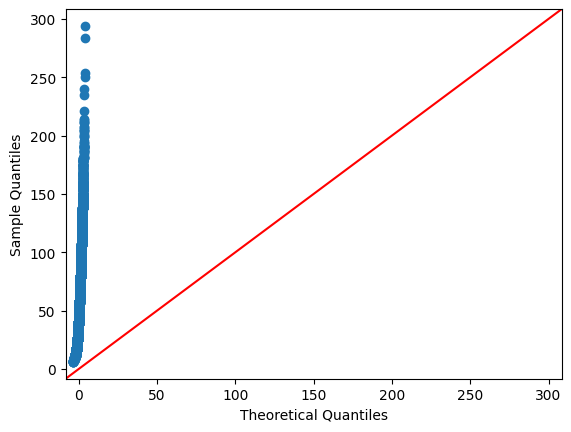

In [ ]:
# To determine if a metric is normally distributed, we use Q-Q plot (Quantile-Quantile plot)
# Q-Q plot helps to visually assess the data's departure from normality.
fig = sm.qqplot(Mean_Days_to_Pending_df['meanDaystoPending'], line='45')
plt.show()

### *Median Days to Pending over the years*

In [ ]:
file_path = root_path + "/data/median_days_to_pending.csv"
Median_Days_to_Pending_df = unpivot_dataframe(file_path, Metric_value='medianDaystoPending')

plot_timeseries(Median_Days_to_Pending_df, 'Median Days to Pending over the years', y_col='medianDaystoPending')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Median_Days_to_Pending_df.describe()

,medianDaystoPending
count,32777.000000
mean,24.667699
std,21.350014
min,2.000000
25%,9.000000
50%,18.000000
75%,33.000000
max,198.000000


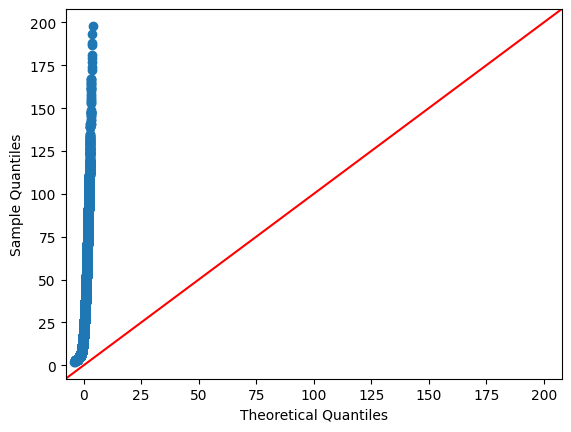

In [ ]:
# To determine if a metric is normally distributed, we use Q-Q plot (Quantile-Quantile plot)
# Q-Q plot helps to visually assess the data's departure from normality.
fig = sm.qqplot(Median_Days_to_Pending_df['medianDaystoPending'], line='45')
plt.show()

### *New Listings over the years*

In [ ]:
file_path = root_path + "/data/new_listings.csv"
New_Listings_df = unpivot_dataframe(file_path, Metric_value='newListings')

plot_timeseries(New_Listings_df, 'New Listings over the years', y_col='newListings')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
New_Listings_df.describe()

,newListings
count,56634.000000
mean,863.840875
std,13555.236850
min,5.000000
25%,43.000000
50%,94.000000
75%,258.000000
max,541207.000000


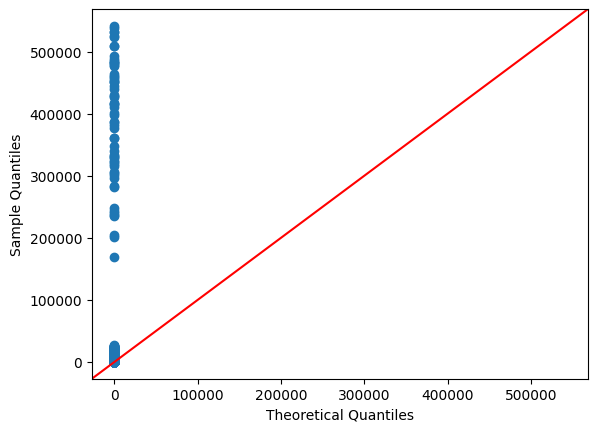

In [ ]:
# To determine if a metric is normally distributed, we use Q-Q plot (Quantile-Quantile plot)
# Q-Q plot helps to visually assess the data's departure from normality.
fig = sm.qqplot(New_Listings_df['newListings'], line='45')
plt.show()

### *ZORI Smoothed over the years*

In [ ]:
file_path = root_path + "/data/zori_smoothed.csv"
ZORI_Smoothed_df = unpivot_dataframe(file_path, Metric_value='smoothedZORI')

plot_timeseries(ZORI_Smoothed_df, 'ZORI Smoothed over the years', y_col='smoothedZORI')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ZORI_Smoothed_df.describe()

,smoothedZORI
count,30625.000000
mean,1281.857326
std,530.361051
min,533.527391
25%,965.437488
50%,1166.760354
75%,1441.440627
max,10772.472481


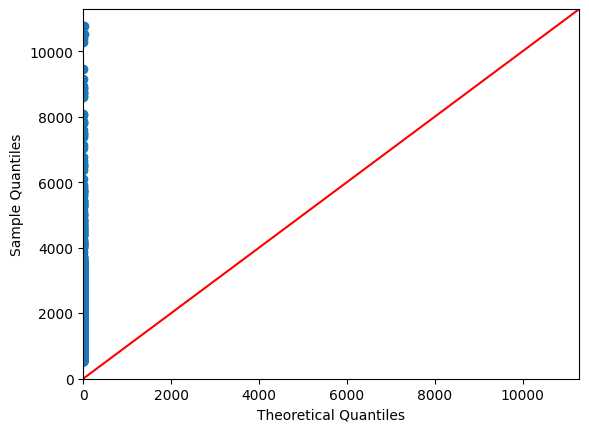

In [ ]:
# To determine if a metric is normally distributed, we use Q-Q plot (Quantile-Quantile plot)
# Q-Q plot helps to visually assess the data's departure from normality.
fig = sm.qqplot(ZORI_Smoothed_df['smoothedZORI'], line='45')
plt.show()

### ***Analysis:***

The metrics analyzed above exhibit a strong trend and seasonality, indicating significant patterns over time. However, it is important to note that these metrics are not normally distributed, as revealed by the QQ Plot.